In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import pearsonr
import nibabel as nb
import seaborn as sns
import plot_funcs

### get the subject

In [2]:
subjlist = '../data/subjectListS900_QC_gr.txt'
f = open(subjlist); mylist = f.read().split("\n"); f.close() 
subjlist = joinedlist = mylist[:-1]
len(subjlist)


709

### read-in individual T1w/T2w intensity values per subject and per subfield

In [3]:
ddir = '../data/tout_group/'

# LSUB
h1  = h5py.File(os.path.join(ddir, 'H709_t1wt2w_lsub.h5'), 'r');
all_t1wt2w_LSUB = np.array(h1['data'])

# LCA
h2  = h5py.File(os.path.join(ddir, 'H709_t1wt2w_lca.h5'), 'r');
all_t1wt2w_LCA = np.array(h2['data'])

# LDG
h3  = h5py.File(os.path.join(ddir, 'H709_t1wt2w_ldg.h5'), 'r');
all_t1wt2w_LDG = np.array(h3['data'])

print('SUB :', all_t1wt2w_LSUB.shape, all_t1wt2w_LSUB.mean(), all_t1wt2w_LSUB.std())
print('CA :', all_t1wt2w_LCA.shape, all_t1wt2w_LCA.mean(), all_t1wt2w_LCA.std())
print('DG :', all_t1wt2w_LDG.shape, all_t1wt2w_LDG.mean(), all_t1wt2w_LDG.std())


SUB : (709, 1024) 2.0242498246710703 0.41059361997124016
CA : (709, 2048) 2.008639068328686 0.7795565840586799
DG : (709, 1024) 1.6564004685715292 0.21753406489589847


### compute group-level T1w/T2w intensity values across subjects 

In [4]:
group_t1wt2w_LSUB = all_t1wt2w_LSUB.mean(axis=0)
group_t1wt2w_LCA = all_t1wt2w_LCA.mean(axis=0)
group_t1wt2w_LDG = all_t1wt2w_LDG.mean(axis=0)

print('SUB: ', group_t1wt2w_LSUB.shape)
print('CA: ', group_t1wt2w_LCA.shape)
print('DG: ', group_t1wt2w_LDG.shape)

SUB:  (1024,)
CA:  (2048,)
DG:  (1024,)


### visualize group-level mean t1w/t2w instensity maps for the subfields 

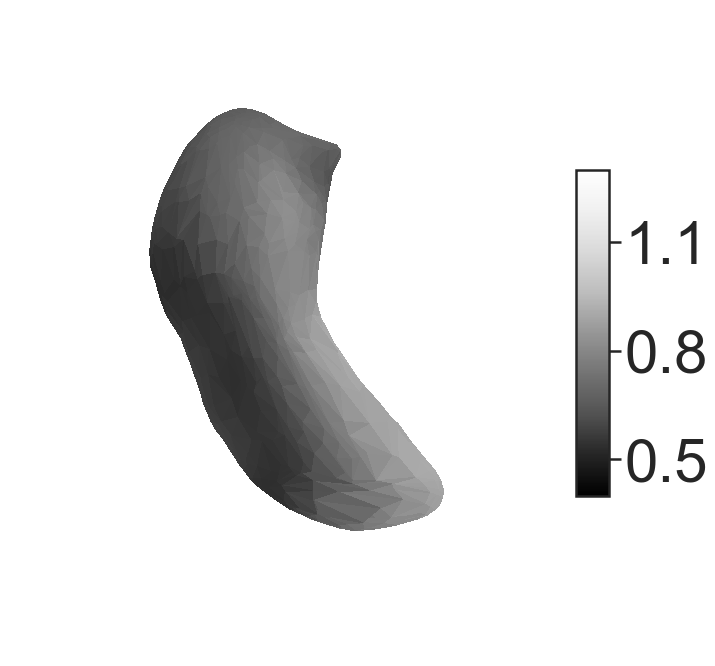

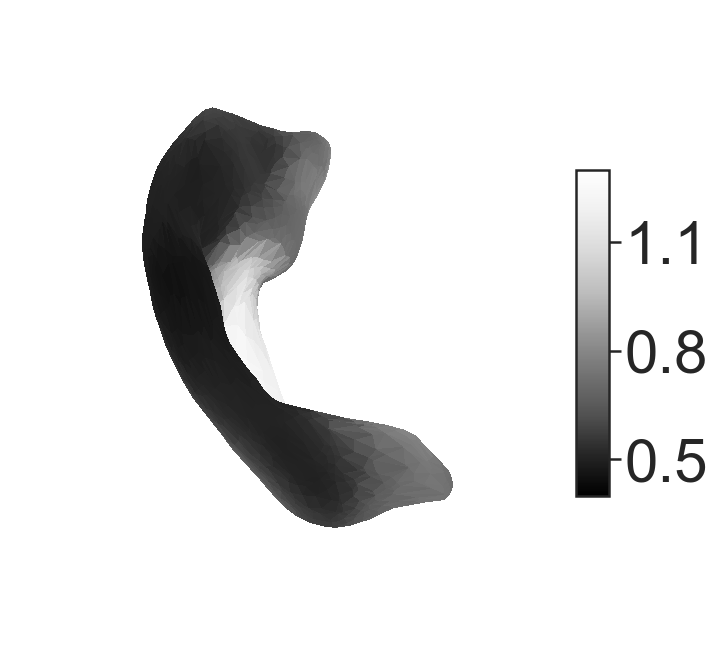

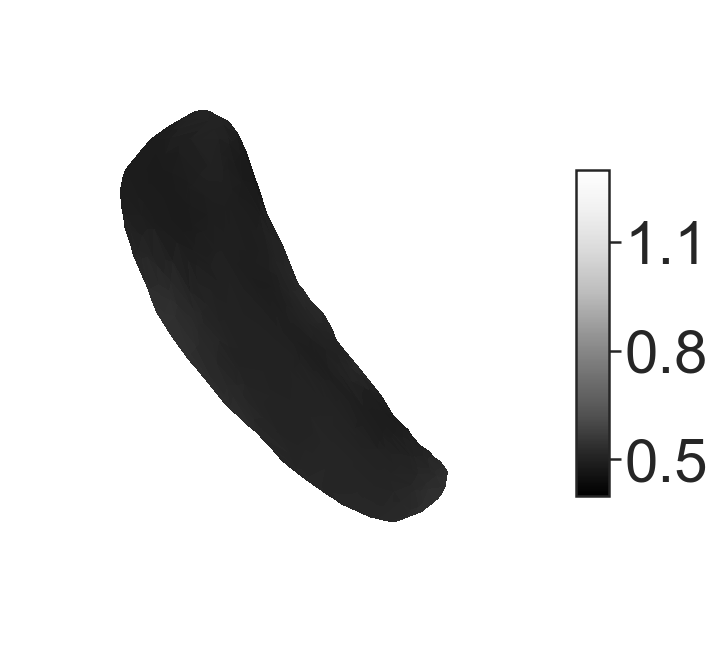

In [5]:
fig1 = plot_funcs.plot_surf(plot_funcs.xLSUB, 
                           plot_funcs.yLSUB, 
                           plot_funcs.zLSUB, 
                           plot_funcs.triLSUB, 
                           np.log(group_t1wt2w_LSUB),
                           'Greys_r',
                           0.4, 1.3)

fig2 = plot_funcs.plot_surf(plot_funcs.xLCA, 
                           plot_funcs.yLCA, 
                           plot_funcs.zLCA, 
                           plot_funcs.triLCA, 
                           np.log(group_t1wt2w_LCA),
                           'Greys_r',
                           0.4, 1.3)

fig3 = plot_funcs.plot_surf(plot_funcs.xLDG, 
                           plot_funcs.yLDG, 
                           plot_funcs.zLDG, 
                           plot_funcs.triLDG, 
                           np.log(group_t1wt2w_LDG),
                           'Greys_r',
                           0.4, 1.3)

#fig1.savefig('../figures/t1wt2w_lsub.svg', dpi=300)
#fig2.savefig('../figures/t1wt2w_lca.svg', dpi=300)
#fig3.savefig('../figures/t1wt2w_ldg.svg', dpi=300)

### read-in individual MEAN T1w/T2w intensity values per subject and per subfield

In [6]:
ddir = '../data/tout_group/'
DF_indiv_mean_t1wt2w = pd.read_csv(os.path.join(ddir,'Hmean709_t1wt2_lsub_lca_ldg.csv'), 
                                   index_col = 0)

DF_indiv_mean_t1wt2w.index = DF_indiv_mean_t1wt2w.index.map(str)

print(DF_indiv_mean_t1wt2w.columns, len(DF_indiv_mean_t1wt2w))

Index(['t1-t2-LSUB', 't1-t2-LCA', 't1-t2-LDG'], dtype='object') 709


### visualize individual MEAN t1w/t2w intensity values for all subjects

0 t1-t2-LSUB
1 t1-t2-LCA
2 t1-t2-LDG


[(1.2, 3.0)]

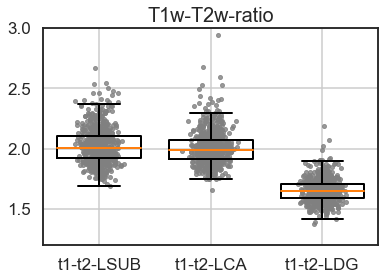

In [7]:
sns.set_context("talk", font_scale=1.1)

colstoplot = ['t1-t2-LSUB', 't1-t2-LCA', 't1-t2-LDG']

dk = pd.DataFrame({'t1-t2-LSUB':np.array(DF_indiv_mean_t1wt2w['t1-t2-LSUB']).astype(float),
                   't1-t2-LCA':np.array(DF_indiv_mean_t1wt2w['t1-t2-LCA']).astype(float),
                   't1-t2-LDG':np.array(DF_indiv_mean_t1wt2w['t1-t2-LDG']).astype(float),})

for i,d in enumerate(colstoplot):
    print(i, d)
    y = dk[d]
    x = np.random.normal(i+1, 0.08, len(y))
    plt.plot(x, y, 
             marker="o", 
             markeredgewidth = 1,
             linestyle='None',
             color='grey', 
             markersize=4,  
             alpha=0.8)
    
ax = dk.boxplot(column=colstoplot,
                fontsize=17, 
                color=dict(boxes='k', whiskers='k', medians='k', caps='k'),
                boxprops=dict(linestyle='-', linewidth=2),
                flierprops=dict(linestyle='-', linewidth=2),
                medianprops=dict(linestyle='-', linewidth=2),
                whiskerprops=dict(linestyle='-', linewidth=2),
                capprops=dict(linestyle='-', linewidth=2),
                widths=(0.75, 0.75, 0.75),
                showfliers=False,)

ax.set_title("T1w-T2w-ratio")    
ax.set(ylim=(1.2, 3))

#plt.savefig('../figures/t1wt2w_mean_dist.svg', dpi=300)

### individual-level correlations between T1w/T2w and G2 (fc) maps

In [8]:
mycols = ['tG2_LSUB', 'tG2_LCA', 'tG2_LDG']

dcorr = pd.DataFrame(index = subjlist, columns = mycols)
dcorr.index.name = 'id'

In [9]:
for subjID in subjlist:

    tdir = '../data/tout_T1wT2w_msm50/'

    vol2hipp_LSUB  = os.path.join(tdir, 'HCP_%s_t1t2_sub_left.h5' % (subjID))
    h_LSUB  = h5py.File(vol2hipp_LSUB, 'r')
    t_LSUB  = np.array(h_LSUB[subjID])

    vol2hipp_LCA  = os.path.join(tdir, 'HCP_%s_t1t2_ca_left.h5' % (subjID))
    h_LCA   = h5py.File(vol2hipp_LCA, 'r')
    t_LCA   = np.array(h_LCA[subjID])

    vol2hipp_LDG  = os.path.join(tdir, 'HCP_%s_t1t2_dg_left.h5' % (subjID))
    h_LDG   = h5py.File(vol2hipp_LDG, 'r')
    t_LDG   = np.array(h_LDG[subjID])

    gdir = '../data/tout_hippoc_grad_flipped_msm50/'
    
    gfile_LSUB = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_LSUB.h5'), 'r')
    g2_LSUB = np.array(gfile_LSUB[subjID])  
    gfile_LSUB.close()

    gfile_LCA = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_LCA.h5'), 'r')
    g2_LCA = np.array(gfile_LCA[subjID])  
    gfile_LCA.close()

    gfile_LDG = h5py.File(os.path.join(gdir, 'HCP_' + subjID + '_G2_LDG.h5'), 'r')
    g2_LDG = np.array(gfile_LDG[subjID])  
    gfile_LDG.close()
  
    iC = dcorr.index.get_loc(subjID)

    dcorr.iloc[iC]['tG2_LSUB'] = pearsonr(np.log(t_LSUB), g2_LSUB)[0]
    dcorr.iloc[iC]['tG2_LCA']  = pearsonr(np.log(t_LCA), g2_LCA)[0]
    dcorr.iloc[iC]['tG2_LDG']  = pearsonr(np.log(t_LDG), g2_LDG)[0]

In [10]:
ddir = '../data/tout_group/'

dcorr = pd.read_csv(os.path.join(ddir,'Hmean709_t1wt2_corr_G2.csv'), 
                    index_col = 0)

dcorr.index = dcorr.index.map(str)

print(dcorr.columns, len(dcorr))

Index(['tG2_LSUB', 'tG2_LCA', 'tG2_LDG'], dtype='object') 709


In [11]:
# reshaping and reformatting the data frame for plotting

dfA = pd.DataFrame(np.concatenate((np.array(dcorr['tG2_LSUB']).astype(float).reshape(709,1),
                   np.array(dcorr['tG2_LCA']).astype(float).reshape(709,1),
                   np.array(dcorr['tG2_LDG']).astype(float).reshape(709,1)), axis=1),
                   columns=['tG2_LSUB', 'tG2_LCA', 'tG2_LDG'])


0 tG2_LSUB
1 tG2_LCA
2 tG2_LDG


(-1.0, 1.0)

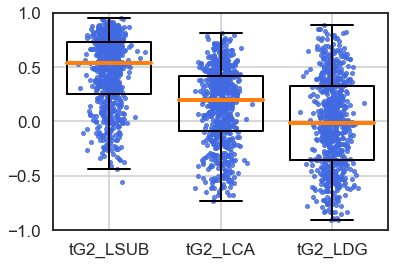

In [12]:
fig = plt.figure()

sns.set_context("talk", font_scale=1.1)

colstoplot = ['tG2_LSUB', 'tG2_LCA', 'tG2_LDG']

for i,d in enumerate(colstoplot):
    print(i, d)
    y = dfA[d]
    x = np.random.normal(i+1, 0.08, len(y))
    plt.plot(x, y, 
             marker="o", 
             markeredgewidth = 1,
             linestyle='None',
             color='royalblue', 
             markersize=4,  
             alpha=0.8)

ax = dfA.boxplot(column=colstoplot,
                fontsize=17, 
                color=dict(boxes='k', whiskers='k', medians='k', caps='k'),
                boxprops=dict(linestyle='-', linewidth=2),
                flierprops=dict(linestyle='-', linewidth=2),
                medianprops=dict(linestyle='-', linewidth=4),
                whiskerprops=dict(linestyle='-', linewidth=2),
                capprops=dict(linestyle='-', linewidth=2),
                widths=(0.75, 0.75, 0.75),
                showfliers=False,)

ax.set_ylim(-1, 1)

#plt.savefig('../figures/t1wt2w_corr_G2_left.svg', dpi=300)

### one-tailed Wilcoxon signed-rank test

In [13]:
from scipy import stats

t, p = stats.wilcoxon(np.array(dcorr['tG2_LSUB'], dtype=float), 
                      y=None, zero_method='zsplit', correction=True)
print( "'tG2_LSUB': t and p : ", t, p, 'median ', dcorr['tG2_LSUB'].median())

t, p = stats.wilcoxon(np.array(dcorr['tG2_LCA'], dtype=float), 
                      y=None, zero_method='zsplit', correction=True)
print( "'tG2_LCA': t and p : ", t, p, 'median ', dcorr['tG2_LCA'].median())

t, p = stats.wilcoxon(np.array(dcorr['tG2_LDG'], dtype=float), 
                      y=None, zero_method='zsplit', correction=True)
print( "'tG2_LDG': t and p : ", t, p, 'median ', dcorr['tG2_LDG'].median())


'tG2_LSUB': t and p :  8803.0 4.176863995588879e-102 median  0.5348064993964552
'tG2_LCA': t and p :  69371.0 4.0965019958184806e-25 median  0.19990719004893576
'tG2_LDG': t and p :  118950.0 0.20615138700332025 median  -0.019121532547666426


## correlations between group-level t1w/t2w and G2 (FC)

In [14]:
# read-in gradients of hippocampal-cortical functional connectivity

ddir = '../data/tout_group/'

h1  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_left.h5'), 'r');

G2_fc_LSUB = np.array(h1['gradients_'][0:1024,1])
G2_fc_LCA = np.array(h1['gradients_'][1024:1024+2048,1])
G2_fc_LDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,1])

### SUB (left)

(0.9256527282841367, 0.0)

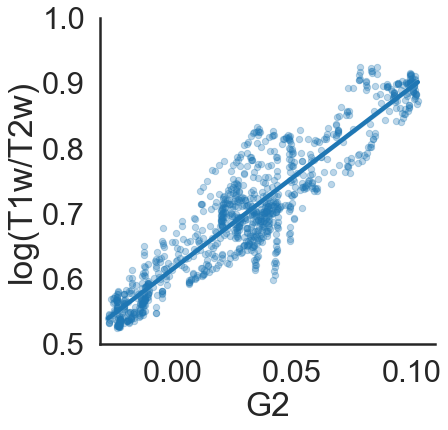

In [15]:
sns.set_context("poster", font_scale=1.4)
sns.set_style('white')

fig = plt.figure(figsize=(6,6));
ax  = sns.regplot(G2_fc_LSUB, np.log(group_t1wt2w_LSUB),
                  scatter_kws={'s': 40, 'alpha':0.3})
ax.set(xlabel='G2', ylabel='log(T1w/T2w)')
ax.set_xlim(-0.03, 0.11)
ax.set_ylim(0.5, 1.0)
sns.despine(left=False, bottom=False, right=True)

#plt.savefig('../figures/t1wt2w_corr_G2fc_lsub.svg', dpi=300)

pearsonr(G2_fc_LSUB, np.log(group_t1wt2w_LSUB))

### CA (left)

(0.23290027230528837, 1.2541637757634368e-26)

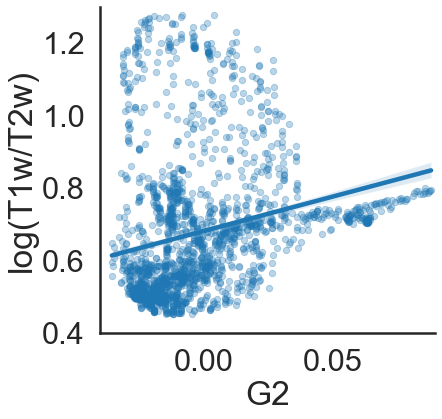

In [16]:
sns.set_context("poster", font_scale=1.4)
sns.set_style('white')

fig = plt.figure(figsize=(6,6));
ax  = sns.regplot(G2_fc_LCA, np.log(group_t1wt2w_LCA),
                  scatter_kws={'s': 40, 'alpha':0.3})
ax.set(xlabel='G2', ylabel='log(T1w/T2w)')
ax.set_xlim(-0.04, 0.09)
ax.set_ylim(0.4, 1.3)
sns.despine(left=False, bottom=False, right=True)

#plt.savefig('../figures/t1wt2w_corr_G2fc_lca.svg', dpi=300)

pearsonr(G2_fc_LCA, np.log(group_t1wt2w_LCA))

### DG (left)

(-0.009796454078338976, 0.7541962147530231)

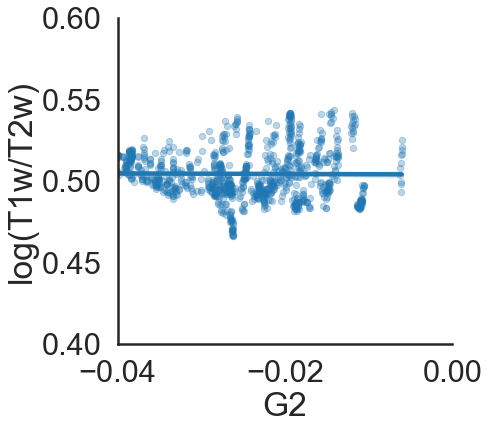

In [17]:
sns.set_context("poster", font_scale=1.4)
sns.set_style('white')

fig = plt.figure(figsize=(6,6));
ax  = sns.regplot(G2_fc_LDG, np.log(group_t1wt2w_LDG),
                  scatter_kws={'s': 40, 'alpha':0.3})
ax.set(xlabel='G2', ylabel='log(T1w/T2w)')
ax.set_xlim(-0.04, 0)
ax.set_ylim(0.4, 0.6)
sns.despine(left=False, bottom=False, right=True)

#plt.savefig('../figures/t1wt2w_corr_G2fc_ldg.svg', dpi=300)

pearsonr(G2_fc_LDG, np.log(group_t1wt2w_LDG))

### variogram matching to correct p-values for spatial-autocorrelations

In [18]:
from scipy.io import loadmat

ddir = '../data/tout_group/'

# get surface coordinates & triangles
LSUBfile = os.path.join(ddir, 'surf_lsub.mat')
LSUBsurf = loadmat(LSUBfile)['ave_lsub'][0,0]
xLSUB = LSUBsurf['coord'][0,:]           # (1024,)
yLSUB = LSUBsurf['coord'][1,:]           # (1024,)
zLSUB = -LSUBsurf['coord'][2,:]          # (1024,)

LCAfile = os.path.join(ddir, 'surf_lca.mat')
LCAsurf = loadmat(LCAfile)['ave_lca'][0,0];
xLCA = LCAsurf['coord'][0,:]           # (2048,)
yLCA = LCAsurf['coord'][1,:]           # (2048,)
zLCA = -LCAsurf['coord'][2,:]          # (2048,)

LDGfile = os.path.join(ddir, 'surf_ldg.mat')
LDGsurf = loadmat(LDGfile)['ave_ldg'][0,0];
xLDG = LDGsurf['coord'][0,:]           # (1024,)
yLDG = LDGsurf['coord'][1,:]           # (1024,)
zLDG = -LDGsurf['coord'][2,:]          # (1024,)

coord_LSUB = np.concatenate((xLSUB.reshape(1024,1), 
                             yLSUB.reshape(1024,1), 
                             zLSUB.reshape(1024,1)), axis=1)

coord_LCA  = np.concatenate((xLCA.reshape(2048,1), 
                             yLCA.reshape(2048,1), 
                             zLCA.reshape(2048,1)), axis=1)

coord_LDG  = np.concatenate((xLDG.reshape(1024,1), 
                             yLDG.reshape(1024,1), 
                             zLDG.reshape(1024,1)), axis=1)

### compute geodesic distance matrices of vertices for each subfield

In [19]:
points_LSUB = np.array(coord_LSUB, dtype='float64')
faces_LSUB  = np.array(LSUBsurf['tri'], dtype='int32') -1

import pygeodesic
import pygeodesic.geodesic as geodesic

# Initialise the PyGeodesicAlgorithmExact class instance
geoalg_LSUB = geodesic.PyGeodesicAlgorithmExact(points_LSUB, faces_LSUB)
distance_LSUB = np.zeros((1024,1024))

for i in range(0, 1024):
    sourceIndex = np.array([i])  
    targetIndex = None
    # Compute the geodesic distance 
    distIndex, best_source = geoalg_LSUB.geodesicDistances(sourceIndex, targetIndex)
    distance_LSUB[i, :] = distIndex

In [20]:
points_LCA = np.array(coord_LCA, dtype='float64')
faces_LCA  = np.array(LCAsurf['tri'], dtype='int32') -1

# Initialise the PyGeodesicAlgorithmExact class instance
geoalg_LCA = geodesic.PyGeodesicAlgorithmExact(points_LCA, faces_LCA)
distance_LCA = np.zeros((2048,2048))

for i in range(0, 2048):
    sourceIndex = np.array([i])  
    targetIndex = None
    # Compute the geodesic distance 
    distIndex, best_source = geoalg_LCA.geodesicDistances(sourceIndex, targetIndex)
    distance_LCA[i, :] = distIndex


In [21]:
points_LDG = np.array(coord_LDG, dtype='float64')
faces_LDG  = np.array(LDGsurf['tri'], dtype='int32') -1

# Initialise the PyGeodesicAlgorithmExact class instance
geoalg_LDG = geodesic.PyGeodesicAlgorithmExact(points_LDG, faces_LDG)
distance_LDG = np.zeros((1024,1024))

for i in range(0, 1024):
    sourceIndex = np.array([i])  
    targetIndex = None
    # Compute the geodesic distance and the path
    distIndex, best_source = geoalg_LDG.geodesicDistances(sourceIndex, targetIndex)
    distance_LDG[i, :] = distIndex

In [22]:
from scipy.sparse.csgraph import dijkstra

distance_LSUB = dijkstra(distance_LSUB, directed=False)
distance_LSUB_idx_sorted = np.argsort(distance_LSUB, axis=1)

distance_LCA = dijkstra(distance_LCA, directed=False)
distance_LCA_idx_sorted = np.argsort(distance_LCA, axis=1)

distance_LDG = dijkstra(distance_LDG, directed=False)
distance_LDG_idx_sorted = np.argsort(distance_LDG, axis=1)

### generate the surragate maps using geodesic disctances

In [23]:
from brainspace.null_models import SampledSurrogateMaps

n_surrogate_datasets = 1000

# Note: number samples must be greater than number neighbors
num_samples = 100
num_neighbors = 50

ssm_LSUB = SampledSurrogateMaps(ns=num_samples, knn=num_neighbors, random_state=0)
ssm_LSUB.fit(distance_LSUB, distance_LSUB_idx_sorted)

ssm_LCA = SampledSurrogateMaps(ns=num_samples, knn=num_neighbors, random_state=0)
ssm_LCA.fit(distance_LCA, distance_LCA_idx_sorted)

ssm_LDG = SampledSurrogateMaps(ns=num_samples, knn=num_neighbors, random_state=0)
ssm_LDG.fit(distance_LDG, distance_LDG_idx_sorted)

G2_fc_LSUB_surrogates = ssm_LSUB.randomize(G2_fc_LSUB, n_rep=n_surrogate_datasets)
G2_fc_LCA_surrogates = ssm_LCA.randomize(G2_fc_LCA, n_rep=n_surrogate_datasets)
G2_fc_LDG_surrogates = ssm_LDG.randomize(G2_fc_LDG, n_rep=n_surrogate_datasets)


G2_lsub:
 observed Pearson 0.92565 
 Obs p-value     : 0.00000e+00
 Variogram p-value: 0.00000e+00

G2_lca:
 observed Pearson 0.23290 
 Obs p-value     : 1.25416e-26
 Variogram p-value: 1.80000e-02

G2_ldg:
 observed Pearson -0.00980 
 Obs p-value     : 7.54196e-01
 Variogram p-value: 9.24000e-01



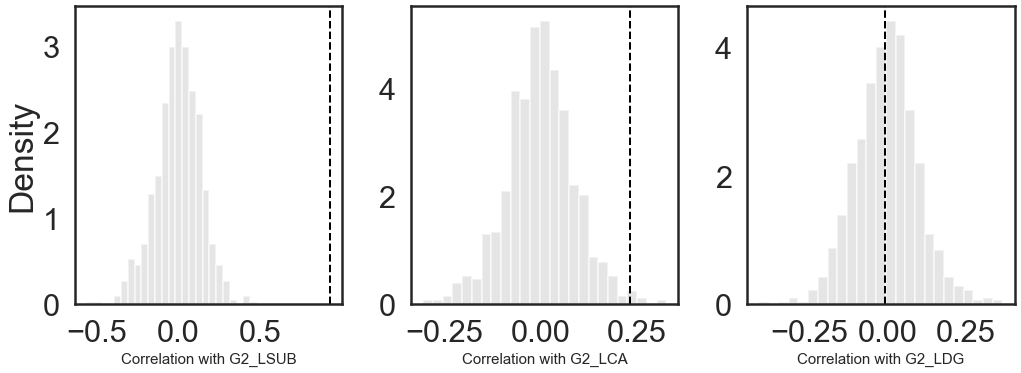

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,6))

# real
feats = {'G2_LSUB': G2_fc_LSUB,
         'G2_LCA' : G2_fc_LCA,
         'G2_LDG' : G2_fc_LDG}
# surrogates
rand = {'G2_LSUB': G2_fc_LSUB_surrogates,
           'G2_LCA' : G2_fc_LCA_surrogates,
           'G2_LDG' : G2_fc_LDG_surrogates}

for k, (fn, data) in enumerate(rand.items()):

    if k == 0:
        XG = np.log(group_t1wt2w_LSUB)
    if k == 1:
        XG = np.log(group_t1wt2w_LCA)
    if k == 2:
        XG = np.log(group_t1wt2w_LDG)
    r_obs, pv_obs = pearsonr(feats[fn], XG)

    # Compute perm pval
    r_rand = np.asarray([pearsonr(XG, d)[0] for d in data])
    pv_rand = np.mean(np.abs(r_rand) >= np.abs(r_obs))

    # Plot null dist
    axs[k].hist(r_rand, bins=25, density=True, alpha=0.5, color=(.8, .8, .8))
    axs[k].axvline(r_obs, lw=2, ls='--', color='k')
    axs[k].set_xlabel(f'Correlation with {fn}', fontsize=15)
    if k == 0:
        axs[k].set_ylabel('Density')

    print(f'{fn.capitalize()}:\n observed Pearson {r_obs:.5f} \n Obs p-value     : {pv_obs:.5e}\n '
          f'Variogram p-value: {pv_rand:.5e}\n')

fig.tight_layout()
plt.show()

## heritability of t1w/t2w intensity maps

In [25]:
# function for fdr corrections
def FDR_sofie(p, q):
    # p : 1D np array, vector of p-values
    # q : float, false discovery rate level
    p = np.sort(p)
    V = len(p)
    I = np.arange(1,V+1)
    cVID = 1
    cVN  = (1 / np.arange(1,V+1)).sum()
    pID  = p[np.max(np.where(p <= (I / V*q / cVID)))]
    pN   = np.where(p <= (I / V*q / cVN))
    return pID, pN

## SUB (left)

In [26]:
# we will read heritability values from 1024 sub vertices
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
# empty data frame to be filled out
df_herit_t1t2_LSUB = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

In [27]:
# read-in heritability scores 
fLSUB = '../solar/solar_msm50_t1t2_lsub/t1t2_LSUB_results_herit.txt'
herit_t1t2_LSUB = pd.read_csv(fLSUB, index_col = 0, header = 0)
herit_t1t2_LSUB.index.name = 'node'

for nodeID in range(1, tot_node_num_lsub+1):

    iA = herit_t1t2_LSUB.index.get_loc(nodeID)
    iB = df_herit_t1t2_LSUB.index.get_loc(nodeID)

    df_herit_t1t2_LSUB.iloc[iB]['H2r'] = herit_t1t2_LSUB.iloc[iA]['H2r']
    df_herit_t1t2_LSUB.iloc[iB]['rp']  = herit_t1t2_LSUB.iloc[iA]['rp']

dataLSUB = np.array(df_herit_t1t2_LSUB['H2r'], dtype = 'float')
pLSUB = np.array(df_herit_t1t2_LSUB['rp'], dtype = 'float')

q = 0.05
pID, pN = FDR_sofie(pLSUB, q)
pID, len(np.where(dataLSUB <= pID)[0]), dataLSUB.max()

(0.0347893, 0, 0.7679011)

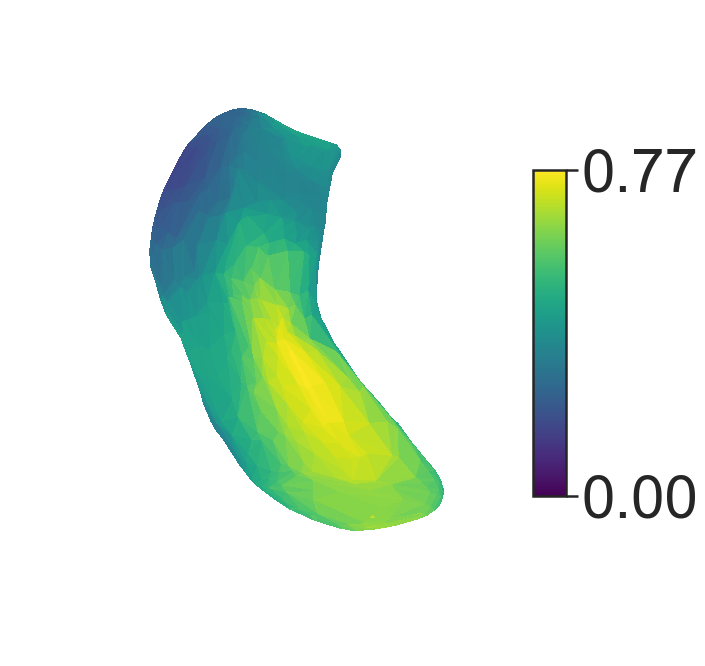

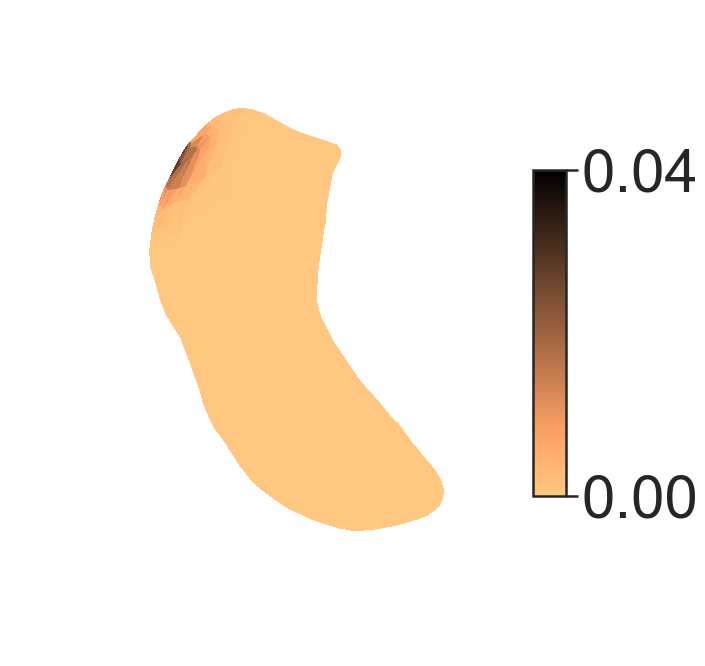

In [28]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  dataLSUB,
                                  'viridis',
                                  0, 0.77)

fig2 = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  pLSUB,
                                  'copper_r',
                                  0, 0.04)

#fig1.savefig('../figures/herit_t1wt2w_lsub_H.svg', dpi=300)
#fig2.savefig('../figures/herit_t1wt2w_lsub_P.svg', dpi=300)


## CA (left)

In [29]:
tot_node_num_lca = 2048
node_str = []
for i in range(1, tot_node_num_lca+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]
# empty data frame to be filled out
df_herit_t1t2_LCA = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

2048


In [30]:
# read-in heritability scores 
fLCA = '../solar/solar_msm50_t1t2_lca/t1t2_LCA_results_herit.txt'
herit_t1t2_LCA = pd.read_csv(fLCA, index_col = 0, header = 0)
herit_t1t2_LCA.index.name = 'node'

for nodeID in range(1, tot_node_num_lca+1):

    iA = herit_t1t2_LCA.index.get_loc(nodeID)
    iB = df_herit_t1t2_LCA.index.get_loc(nodeID)

    df_herit_t1t2_LCA.iloc[iB]['H2r'] = herit_t1t2_LCA.iloc[iA]['H2r']
    df_herit_t1t2_LCA.iloc[iB]['rp']  = herit_t1t2_LCA.iloc[iA]['rp']

dataLCA = np.array(df_herit_t1t2_LCA['H2r'], dtype = 'float')
pLCA = np.array(df_herit_t1t2_LCA['rp'], dtype = 'float')

q = 0.05
pID, pN = FDR_sofie(pLCA, q)
pID, len(np.where(pLCA <= pID)[0]), dataLCA.max()

(0.047305400000000004, 2035, 0.6141778)

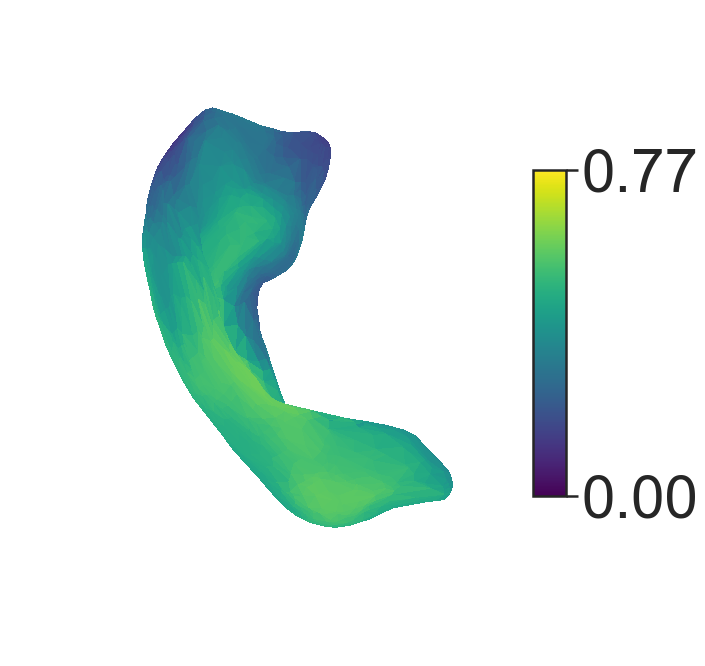

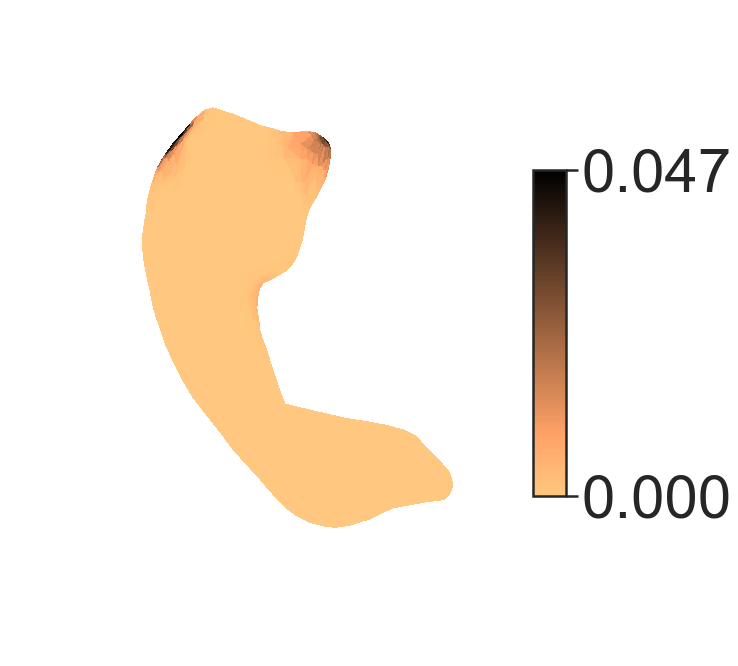

In [31]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                  plot_funcs.yLCA, 
                                  plot_funcs.zLCA, 
                                  plot_funcs.triLCA, 
                                  dataLCA,
                                  'viridis',
                                  0, 0.77)

fig2 = plot_funcs.plot_surf_upper3(plot_funcs.xLCA, 
                                  plot_funcs.yLCA, 
                                  plot_funcs.zLCA, 
                                  plot_funcs.triLCA, 
                                  pLCA,
                                  'copper_r',
                                  0, pID)

#fig1.savefig('../figures/herit_t1wt2w_lca_H.svg', dpi=300)
#fig2.savefig('../figures/herit_t1wt2w_lca_P.svg', dpi=300)


## DG (left)

In [32]:
tot_node_num_ldg = 1024
node_str = []
for i in range(1, tot_node_num_ldg+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]
# empty data frame to be filled out
df_herit_t1t2_LDG = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

1024


In [33]:
# read-in heritability scores 
fLDG = '../solar/solar_msm50_t1t2_ldg/t1t2_LDG_results_herit.txt'
herit_t1t2_LDG = pd.read_csv(fLDG, index_col = 0, header = 0)
herit_t1t2_LDG.index.name = 'node'

for nodeID in range(1, tot_node_num_ldg+1):

    iA = herit_t1t2_LDG.index.get_loc(nodeID)
    iB = df_herit_t1t2_LDG.index.get_loc(nodeID)

    df_herit_t1t2_LDG.iloc[iB]['H2r'] = herit_t1t2_LDG.iloc[iA]['H2r']
    df_herit_t1t2_LDG.iloc[iB]['rp']  = herit_t1t2_LDG.iloc[iA]['rp']

dataLDG = np.array(df_herit_t1t2_LDG['H2r'], dtype = 'float')
pLDG = np.array(df_herit_t1t2_LDG['rp'], dtype = 'float')

q = 0.05
pID, pN = FDR_sofie(pLDG, q)
pID, len(np.where(pLDG <= pID)[0]), dataLDG.max()

(0.0017930999999999997, 1024, 0.5723038)

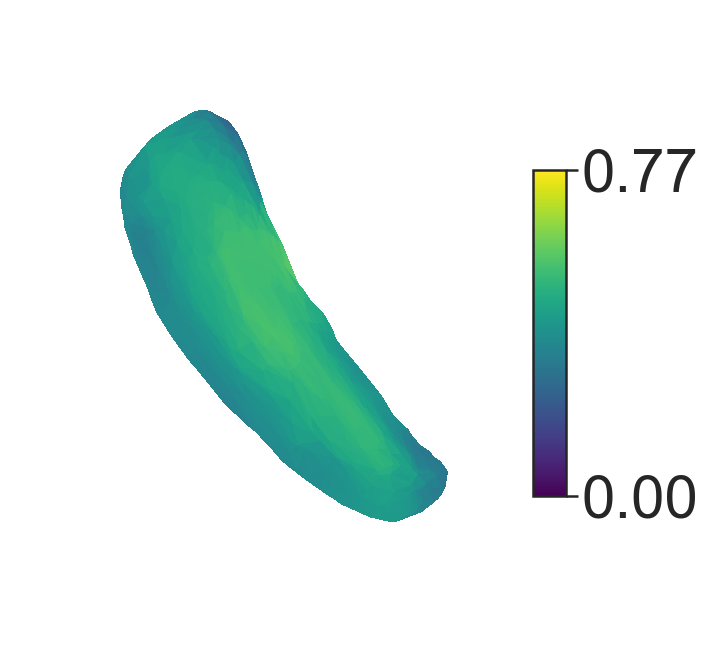

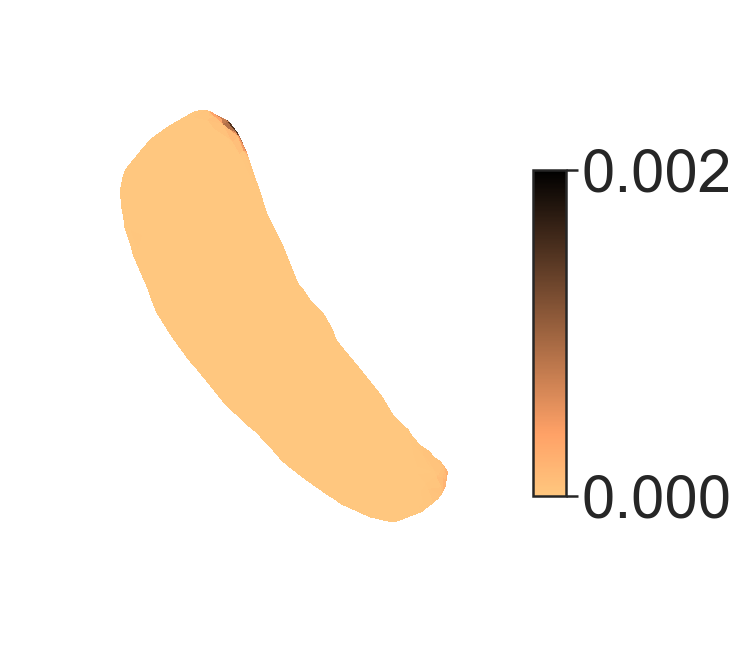

In [34]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                  plot_funcs.yLDG, 
                                  plot_funcs.zLDG, 
                                  plot_funcs.triLDG, 
                                  dataLDG,
                                  'viridis',
                                  0, 0.77)

fig2 = plot_funcs.plot_surf_upper3(plot_funcs.xLDG, 
                                  plot_funcs.yLDG, 
                                  plot_funcs.zLDG, 
                                  plot_funcs.triLDG, 
                                  pLDG,
                                  'copper_r',
                                  0, pID)

#fig1.savefig('../figures/herit_t1wt2w_ldg_H.svg', dpi=300)
#fig2.savefig('../figures/herit_t1wt2w_ldg_P.svg', dpi=300)
